Nome: Guilherme Augusto Ferreira da Silva

### Importando os modulos, Pre-Processamento e Normalização

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

Carregando DataSet

In [3]:
from sklearn.datasets import load_wine
data = load_wine()

In [4]:
data.target[[10, 80, 140]]

array([0, 1, 2])

In [5]:
list(data.target_names)

['class_0', 'class_1', 'class_2']

In [6]:
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [7]:
type(data)

sklearn.utils.Bunch

In [8]:
pdata = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

In [9]:
type(pdata)

pandas.core.frame.DataFrame

In [10]:
print(pdata.shape)
pdata.head()

(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [11]:
#Verificando valores nulos no dataset
pdata.isnull().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
target                          False
dtype: bool

In [12]:
#Avaliando outliers
pdata.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


C:\Users\gfsilva\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


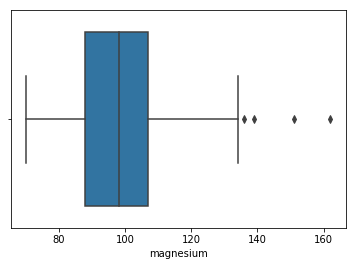

In [13]:
sns.boxplot(pdata['magnesium'])

In [14]:
# Baseado na imagem acima podemos perceber alguns outliers na coluna magnesium.
# Como cheguei até essa coluna: Bati o olho nos valores de media e na distribuição dos quartetos e vi que o numero 162000
# e vi que o número estava muito acima dos demais, portanto resolvi fazer um boxplot para confirmar a suspeita de outliers

In [15]:
#Excluindo os outliers
from scipy import stats
zscore = np.abs(stats.zscore(pdata)) 
pdata = pdata[(zscore <3).all(axis = 1)] 
pdata.shape

(168, 14)

In [16]:
#Avaliando outliers novamente
pdata.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,13.033214,2.343571,2.369226,19.361310,98.779762,2.273988,2.010298,0.362679,1.553155,5.116726,0.951226,2.596607,752.875000,0.934524
std,0.793084,1.097823,0.243202,3.118708,12.560477,0.627890,0.985189,0.123940,0.529569,2.243267,0.220522,0.714607,319.272211,0.790209
min,11.410000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.370000,1.610000,2.230000,17.175000,88.000000,1.700000,1.097500,0.270000,1.235000,3.292500,0.787500,1.905000,501.500000,0.000000
50%,13.060000,1.870000,2.360000,19.250000,97.500000,2.265000,2.100000,0.340000,1.505000,4.850000,0.960000,2.775000,675.000000,1.000000
75%,13.695000,3.105000,2.542500,21.500000,106.250000,2.800000,2.885000,0.430000,1.870000,6.262500,1.112500,3.170000,1016.250000,2.000000
max,14.830000,5.650000,2.920000,28.500000,136.000000,3.880000,3.930000,0.660000,2.960000,11.750000,1.450000,4.000000,1680.000000,2.000000


In [17]:
# Podemos observar cima que tinhamos 10 linhas consideradas outliers
# onde as mesmas impactariam negativamento o treinamento do modelo

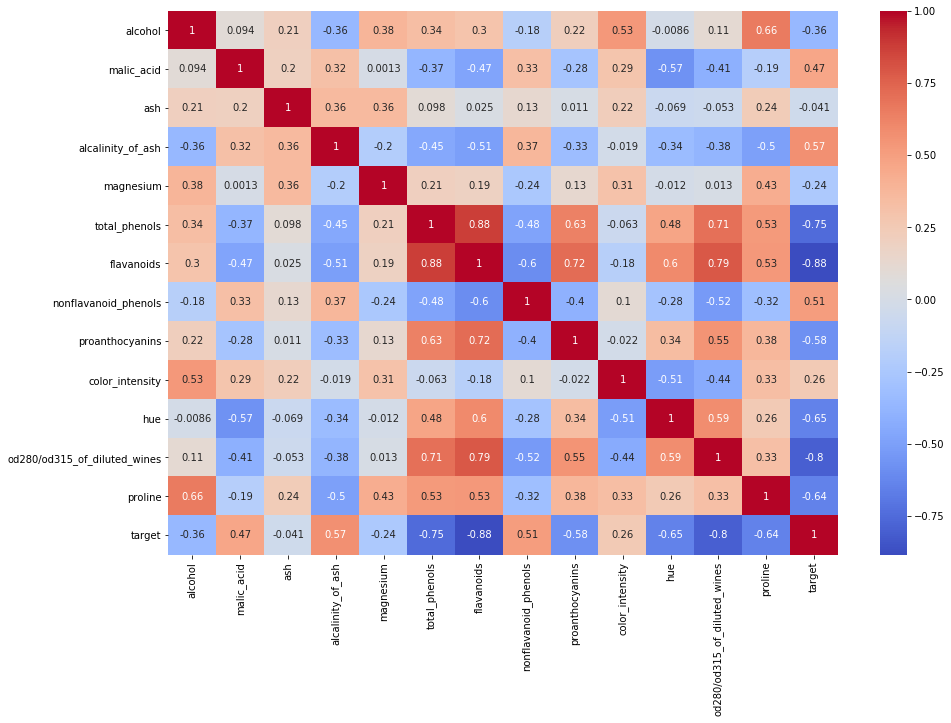

In [18]:
# Podemos também ver a correlação para avaliar a exclsão de alguma coluna eventualmente
plt.subplots(figsize=(15, 10)) 
sns.heatmap(pdata.corr(),annot=True,cmap='coolwarm')

In [19]:
# definindo as features de X
X = np.asarray(pdata.iloc[:,:-1])

# definindo o target de y
y = np.asarray(pdata['target'])

In [20]:
#Dividindo o dataset em treino e teste. 80% para treino e 20% para teste

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print('Treino:', X_train.shape, y_train.shape)
print('Teste:', X_test.shape, y_test.shape)

Treino: (134, 13) (134,)
Teste: (34, 13) (34,)


### Finalizado a parte de Carregamento preprocessamento e normalização

### Treinamentos KNN:

In [21]:
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print('accuracy',accuracy_score(y_test, y_pred))

accuracy 0.7058823529411765


In [23]:
def treinamentoKNN(nneighbors):
    neigh = KNeighborsClassifier(n_neighbors=nneighbors)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    print('accuracy',accuracy_score(y_test, y_pred))


In [24]:
for i in range(30):
    treinamentoKNN(i+5)

accuracy 0.7058823529411765
accuracy 0.6470588235294118
accuracy 0.6470588235294118
accuracy 0.6764705882352942
accuracy 0.6470588235294118
accuracy 0.6470588235294118
accuracy 0.6470588235294118
accuracy 0.6764705882352942
accuracy 0.6764705882352942
accuracy 0.6470588235294118
accuracy 0.6470588235294118
accuracy 0.6176470588235294
accuracy 0.6176470588235294
accuracy 0.6764705882352942
accuracy 0.6764705882352942
accuracy 0.7058823529411765
accuracy 0.7058823529411765
accuracy 0.7058823529411765
accuracy 0.7058823529411765
accuracy 0.7058823529411765
accuracy 0.7058823529411765
accuracy 0.7352941176470589
accuracy 0.7058823529411765
accuracy 0.7058823529411765
accuracy 0.7058823529411765
accuracy 0.7058823529411765
accuracy 0.7058823529411765
accuracy 0.7058823529411765
accuracy 0.7058823529411765
accuracy 0.7058823529411765


### Treinamentos MLP:

In [25]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5,2), alpha=1e-5,
                    solver='lbfgs', verbose=0, random_state=1,
                    learning_rate_init=.1, activation='relu')

mlp.fit(X_train, y_train)
#print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Test set score: 0.352941


In [27]:
from sklearn.neural_network import MLPClassifier
def treinamentoMLP(ativacao,lrate,epochs):
    mlp = MLPClassifier(hidden_layer_sizes=(1000,2), alpha=1e-5,
                    solver='lbfgs', verbose=0, random_state=1,
                    learning_rate_init=lrate, activation=ativacao,max_iter=epochs)
    mlp.fit(X_train, y_train)
    #print("Training set score: %f" % mlp.score(X_train, y_train))
    print("Test set score: %f" % mlp.score(X_test, y_test))

In [29]:
for i in range(30):
    if (i%2)==0:
        print("Resultado com ativação relu, lrate .1 e numero de iteração " + str(i+5))
        treinamentoMLP('relu',.1,i+5)
    else:
        print("Resultado com ativação identity, lrate .01 e numero de  iteração " + str(i+5))
        treinamentoMLP('identity',.01,i+5)
        

Resultado com ativação relu, lrate .1 e numero de iteração 5
Test set score: 0.323529
Resultado com ativação identity, lrate .01 e numero de  iteração 6
Test set score: 0.088235
Resultado com ativação relu, lrate .1 e numero de iteração 7
Test set score: 0.352941
Resultado com ativação identity, lrate .01 e numero de  iteração 8
Test set score: 0.088235
Resultado com ativação relu, lrate .1 e numero de iteração 9
Test set score: 0.352941
Resultado com ativação identity, lrate .01 e numero de  iteração 10
Test set score: 0.323529
Resultado com ativação relu, lrate .1 e numero de iteração 11
Test set score: 0.352941
Resultado com ativação identity, lrate .01 e numero de  iteração 12
Test set score: 0.470588
Resultado com ativação relu, lrate .1 e numero de iteração 13
Test set score: 0.352941
Resultado com ativação identity, lrate .01 e numero de  iteração 14
Test set score: 0.529412
Resultado com ativação relu, lrate .1 e numero de iteração 15
Test set score: 0.352941
Resultado com ativ